In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Escalador para modelos que lo requieren
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Modelos
lr = LinearRegression().fit(X_train, y_train)
tree = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train_scaled, y_train)
svm = SVR().fit(X_train_scaled, y_train)

In [ ]:
sample = pd.DataFrame([{
    'MedInc': 3.5,
    'HouseAge': 25,
    'AveRooms': 4,
    'AveBedrms': 1,
    'Population': 1000,
    'AveOccup': 3,
    'Latitude': 34,
    'Longitude': -118,
    'MedHouseVal': 4
}])

sample_scaled = scaler.transform(sample)

In [ ]:
print("🔵 Regresión Lineal:", round(lr.predict(sample)[0] * 100000, 2), "USD")
print("🌳 Árbol de Decisión:", round(tree.predict(sample)[0] * 100000, 2), "USD")
print("📍 KNN:", round(knn.predict(sample_scaled)[0] * 100000, 2), "USD")
print("📊 SVR:", round(svm.predict(sample_scaled)[0] * 100000, 2), "USD")

🔵 Regresión Lineal: 400000.0 USD
🌳 Árbol de Decisión: 398901.24 USD
📍 KNN: 384140.0 USD
📊 SVR: 409899.17 USD


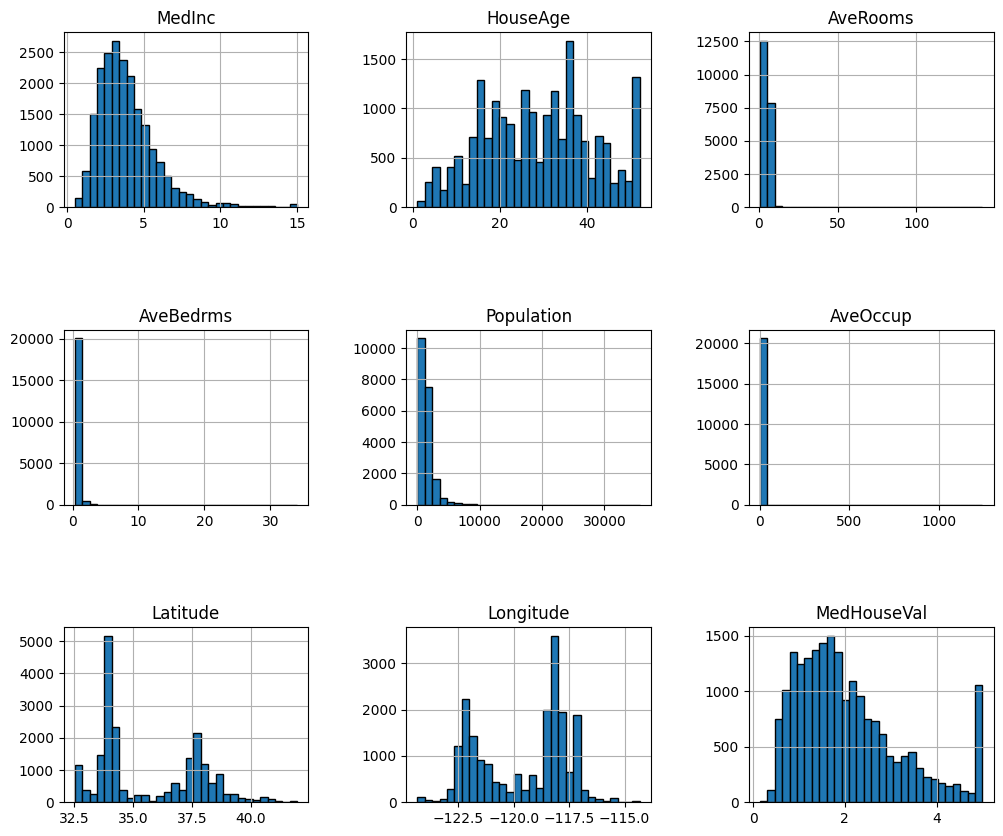

In [ ]:
import matplotlib.pyplot as plt

data.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
